In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = sns.load_dataset('Titanic')

In [ ]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
425,0,3,male,NaN,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
603,0,3,male,44.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
768,0,3,male,NaN,1,0,24.1500,Q,Third,man,True,NaN,Queenstown,no,False
294,0,3,male,24.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
610,0,3,female,39.0,1,5,31.2750,S,Third,woman,False,NaN,Southampton,no,False
496,1,1,female,54.0,1,0,78.2667,C,First,woman,False,D,Cherbourg,yes,False
823,1,3,female,27.0,0,1,12.4750,S,Third,woman,False,E,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
322,1,2,female,30.0,0,0,12.3500,Q,Second,woman,False,NaN,Queenstown,yes,True
663,0,3,male,36.0,0,0,7.4958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Drop 'deck' column due to high NAN values.

In [ ]:
df.drop(columns='deck', inplace= True)

Drop 'pclass' , 'embarked' and 'alive' columns because of redundancy.

In [ ]:
df.drop(columns=['pclass', 'embarked', 'alive'], inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          714 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   class        891 non-null    object 
 7   who          891 non-null    object 
 8   adult_male   891 non-null    bool   
 9   embark_town  889 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 64.5+ KB


In [ ]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,True,Southampton,True


Replace NAN VALUES

In [ ]:
df.embark_town.fillna(df.embark_town.mode()[0], inplace= True)

In [ ]:
df.embark_town.value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
df.age.fillna(df.age.median(), inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          891 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   class        891 non-null    object 
 7   who          891 non-null    object 
 8   adult_male   891 non-null    bool   
 9   embark_town  891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 64.5+ KB


In [ ]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,True,Southampton,True


Combine parch and sibsp into Family

In [ ]:
df['family'] = df.sibsp + df.parch

In [ ]:
df.drop(columns=['sibsp', 'parch', 'alone'], inplace= True)

In [ ]:
df.head()

,survived,sex,age,fare,class,who,adult_male,embark_town,family
0,0,male,22.0,7.2500,Third,man,True,Southampton,1
1,1,female,38.0,71.2833,First,woman,False,Cherbourg,1
2,1,female,26.0,7.9250,Third,woman,False,Southampton,0
3,1,female,35.0,53.1000,First,woman,False,Southampton,1
4,0,male,35.0,8.0500,Third,man,True,Southampton,0


Handle Outliers

In [ ]:
df.describe()

,survived,age,fare,family
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,32.204208,0.904602
std,0.486592,13.019697,49.693429,1.613459
min,0.000000,0.420000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000
50%,0.000000,28.000000,14.454200,0.000000
75%,1.000000,35.000000,31.000000,1.000000
max,1.000000,80.000000,512.329200,10.000000


<AxesSubplot:xlabel='age'>

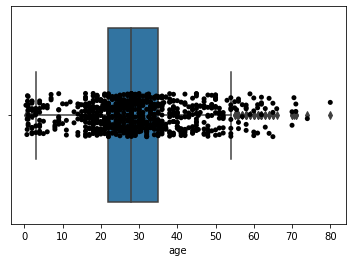

In [ ]:
sns.boxplot(x=df.age)
sns.stripplot(x=df.age, color='black')

<AxesSubplot:xlabel='fare'>

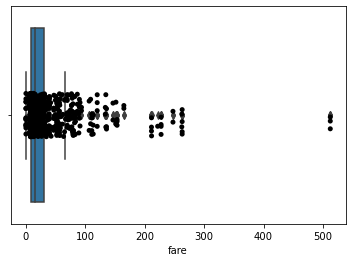

In [ ]:
sns.boxplot(x=df.fare)
sns.stripplot(x=df.fare, color='black')

<AxesSubplot:xlabel='family'>

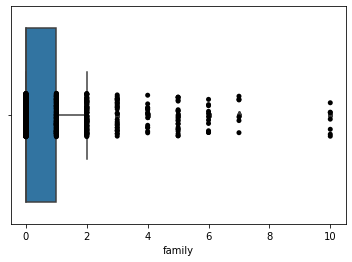

In [ ]:
sns.boxplot(x=df.family)
sns.stripplot(x=df.family, color='black')

In [ ]:
from datasist.structdata import detect_outliers

In [ ]:
for c in df.columns[[2, 3, -1]]:
    outliers_indices = detect_outliers(df, 0, [c])
    median = df[c].median()
    df[c].iloc[outliers_indices] = median

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14952\3810296544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c].iloc[outliers_indices] = median


In [ ]:
df.describe()

,survived,age,fare,family
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,28.476992,17.383622,0.409652
std,0.486592,9.793559,12.713016,0.686529
min,0.000000,3.000000,0.000000,0.000000
25%,0.000000,23.750000,7.910400,0.000000
50%,0.000000,28.000000,14.454200,0.000000
75%,1.000000,33.000000,24.150000,1.000000
max,1.000000,54.000000,65.000000,2.000000


<AxesSubplot:xlabel='age'>

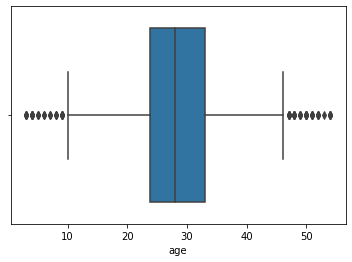

In [ ]:
sns.boxplot(x=df.age)

<AxesSubplot:xlabel='fare'>

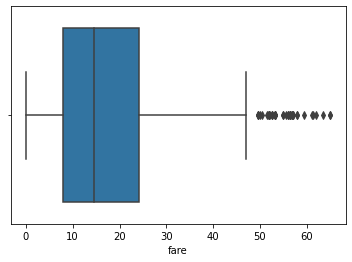

In [ ]:
sns.boxplot(x=df.fare)

<AxesSubplot:xlabel='family'>

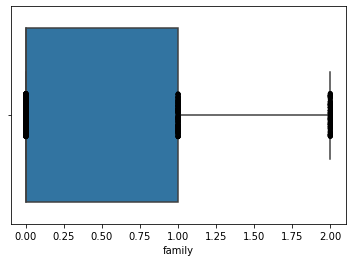

In [ ]:
sns.boxplot(x=df.family)
sns.stripplot(x=df.family, color='black')

In [ ]:
df.head()

,survived,sex,age,fare,class,who,adult_male,embark_town,family
0,0,male,22.0,7.2500,Third,man,True,Southampton,1
1,1,female,38.0,14.4542,First,woman,False,Cherbourg,1
2,1,female,26.0,7.9250,Third,woman,False,Southampton,0
3,1,female,35.0,53.1000,First,woman,False,Southampton,1
4,0,male,35.0,8.0500,Third,man,True,Southampton,0


Work with Categorical Data (Ordinal)

<AxesSubplot:xlabel='class', ylabel='count'>

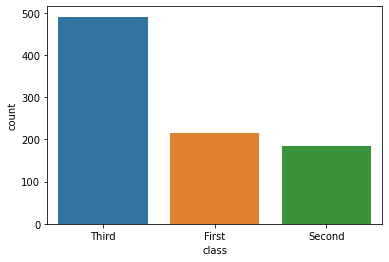

In [ ]:
sns.countplot(x=df['class'])

In [ ]:
encoded_class = {'Third':1,
            'Second':2,
            'First':3}

In [ ]:
df['class'] = df['class'].map(encoded_class)

In [ ]:
df.head()

,survived,age,fare,class,family,sex_male,who_man,who_woman,adult_male_True,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,7.2500,1,1,1,1,0,1,0,1
1,1,38.0,14.4542,3,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,53.1000,3,1,0,0,1,0,0,1
4,0,35.0,8.0500,1,0,1,1,0,1,0,1


Work with Categorical Data (Nominal)

In [ ]:
df = pd.get_dummies(data= df, columns= ['sex', 'who', 'adult_male', 'embark_town'], drop_first=True)

Train Data

In [ ]:
X = df.drop('survived', axis=1)
y = df['survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
x_train['class'].value_counts()

1    389
3    179
2    144
Name: class, dtype: int64

In [ ]:
x_test['class'].value_counts()

1    102
2     40
3     37
Name: class, dtype: int64